# Kernel SVM

## Importing Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

## Importing Data

In [2]:
dataset = pd.read_csv('Datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Split the Data into Training/ Testing Sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train[1])

[   59 83000]


## Feature Scaling

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training the Kernel SVM Model on Training Data 

In [6]:
SVM = SVC(kernel = 'rbf', random_state = 0)
SVM.fit(X_train, y_train)

SVC(random_state=0)

## Predicting a New Result

In [9]:
print(SVM.predict([X_test[0, :]]))

[0]


## Predicting the Test Set Results

In [13]:
yHat = SVM.predict(X_test)
print(np.concatenate((yHat.reshape(-1, 1), y_test.reshape(-1, 1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [19]:
print(confusion_matrix(yHat, y_test))
print(f"Accuracy Score: {accuracy_score(yHat, y_test) * 100} %")

[[55  1]
 [ 3 21]]
Accuracy Score: 95.0 %


## Visualising the Training Set Results

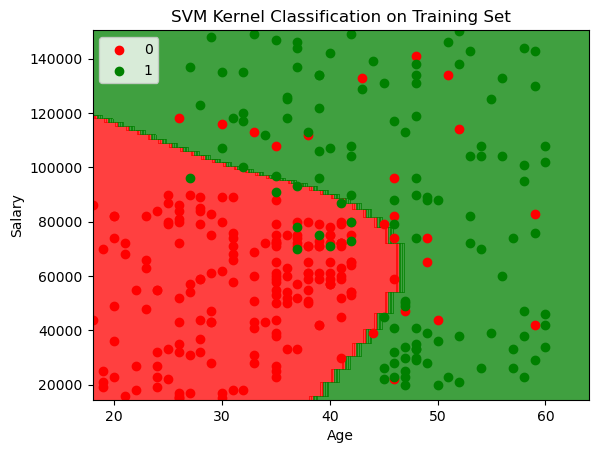

In [25]:
X_set, y_set = scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 5, stop = X_set[:,0].max() + 5, step = 1), 
                   np.arange(start = X_set[:, 1].min() - 500, stop = X_set[:, 1].max() + 500, step = 1))
plt.contourf(X1, X2, SVM.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75,
            cmap = ListedColormap(('red', 'green')))
plt.xlim(X.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Kernel Classification on Training Set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Visualising the Test Sets Results

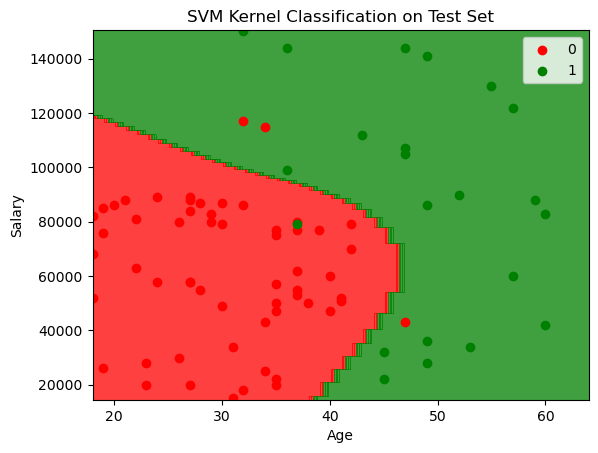

In [26]:
X_set, y_set = scaler.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 5, stop = X_set[:,0].max() + 5, step = 1), 
                   np.arange(start = X_set[:, 1].min() - 500, stop = X_set[:, 1].max() + 500, step = 1))
plt.contourf(X1, X2, SVM.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75,
            cmap = ListedColormap(('red', 'green')))
plt.xlim(X.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Kernel Classification on Test Set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()